Problem 7 - Solution

<img src="p7.png">

a) From the circuit model the EMF can be found by calculating the equivalent reactance between gen and stiff grid.

In [148]:
# Import libraries
import math, cmath

# Parameters
Pe = 1 #pu
pf = 0.95 # lagging
V = 1 #pu
xd = 0.3 #pu
xt = 0.1 #pu
xl12 = 0.2 #pu
xl13 = 0.1 #pu
xl23 = 0.2 #pu

#Calculations
xeq = xd+xt+((xl12*(xl13+xl23))/(xl12+(xl13+xl23))) #pu
print('Xeq:', xeq,'pu')

Vconj = cmath.rect(1,math.radians(0)) #pu
Vmag, Eang = cmath.polar(Vconj)

theta_rad = math.acos(0.95)#radians
Irect = cmath.rect(Pe/(V*pf),-theta_rad)
Imag, Iang = cmath.polar(Irect)
print('I in polar:', round(Imag, 3), 'pu <', round(math.degrees(Iang), 3), 'deg')

jc = cmath.rect(1,math.radians(90))

E = Vconj+(xeq*Irect*jc) #pu
Emag, Eang = cmath.polar(E)
print('E in polar:', round(Emag, 3), 'pu <', round(math.degrees(Eang), 3), 'deg\n')

Xeq: 0.52 pu
I in polar: 1.053 pu < -18.195 deg
E in polar: 1.281 pu < 23.946 deg



b) The determinine the gen electrical power the equivalent reactance as well as EMF and stiff grid voltage can be used.

In [149]:
Pe_function_mag = (Emag*V/xeq)
print('Pe function:', round(Pe_function_mag,3),'*sin(power angle)')

Pe function: 2.464 *sin(power angle)


c) The equal are criteria can be applied, considering power angle initial condition and dd/dt=0. Later, at 0.06 seconds the angle value can be found.
<img src="p7a.png">

In [150]:
Power_angle_prefault = math.asin(Pe*xeq/(Emag*Vmag))
Pmax = (Emag*Vmag)/xeq
print('Power angle initial condition in degrees:', round(math.degrees(Power_angle_prefault), 3), 'deg')
print('Power angle initial condition in radians:', round(Power_angle_prefault,3), 'rad')

Power angle initial condition in degrees: 23.946 deg
Power angle initial condition in radians: 0.418 rad


In [151]:
#Parameters
tc=0.06 #seconds after fault is cleared
H = 3 #MJ/MVA
f=60 #hz assumed

Power_angle_fault_cleared = (2*math.pi*f*Pe/(4*H))*(tc**2)+Power_angle_prefault
print('Power angle after fault cleared in degrees:', round(math.degrees(Power_angle_fault_cleared),3), 'deg')
print('Power angle after fault cleared in radians:', round(Power_angle_fault_cleared,3), 'rad')

Power angle after fault cleared in degrees: 30.426 deg
Power angle after fault cleared in radians: 0.531 rad


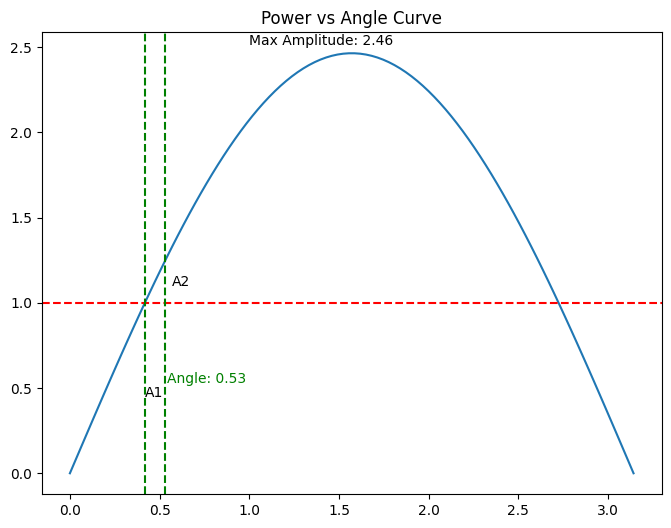

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Create a new figure object with a larger size
plt.figure(figsize=(8,6))

# Create an array of x values from 0 to 2pi with 100 points
x = np.linspace(0, 2*np.pi/2, 100)

# Calculate the y values for sin(x)
y = Pe_function_mag*np.sin(x)

# Calculate the maximum amplitude value of sin(x)
max_amplitude = np.amax(y)

# Plot the sin function
plt.plot(x, y)

# Add a horizontal line at y=1
plt.axhline(y=1, color='red', linestyle='--')

# Add a vertical line at x=0.418
plt.axvline(x=0.418, color='green', linestyle='--')

# Add a vertical line at x=0.531
plt.axvline(x=0.531, color='green', linestyle='--')



# Add labels and title to the plot
plt.xlabel('')
plt.ylabel('')
plt.title('Power vs Angle Curve')

# Remove the x and y axis tick labels
#plt.gca().set_xticks([])

# Display the maximum amplitude value on the plot
plt.text(1, max_amplitude+0.05, f'Max Amplitude: {max_amplitude:.2f}')
plt.text(0.54, Power_angle_fault_cleared, f'Angle: {Power_angle_fault_cleared:.2f}',color='green')

# Display area text
plt.text(0.418, 0.45, 'A1')
plt.text(0.57, 1.1, 'A2')

# Display the plot
plt.show()